# App Segmentation (EDA)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

### Data Pre-Processing

In [2]:
# Reading the CSV File
df = pd.read_csv('userbehaviour.csv')

In [3]:
# Printing the top 5 rows
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


In [4]:
# Printing the last 5 rows
df.tail()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
994,1995,38.0,938.0,0,5,4,1865,Installed
995,1996,43.0,61.0,0,6,8,1327,Installed
996,1997,47.0,761.0,0,6,1,1936,Installed
997,1998,6.0,73.0,1,5,1,3436,Installed
998,1999,9.0,54.0,0,4,2,4039,Installed


In [5]:
# Shape of the Dataset
df.shape

(999, 8)

In [6]:
# Statistical Data of the CSV File
df.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,999.0,1500.000000,288.530761,1001.0,1250.5,1500.0,1749.5,1999.0
Average Screen Time,999.0,24.390390,14.235415,0.0,12.0,24.0,36.0,50.0
Average Spent on App (INR),999.0,424.415415,312.365695,0.0,96.0,394.0,717.5,998.0
Left Review,999.0,0.497497,0.500244,0.0,0.0,0.0,1.0,1.0
Ratings,999.0,6.513514,2.701511,0.0,5.0,7.0,9.0,10.0
New Password Request,999.0,4.941942,2.784626,1.0,3.0,5.0,7.0,15.0
Last Visited Minutes,999.0,5110.898899,8592.036516,201.0,1495.5,2865.0,4198.0,49715.0


<Axes: >

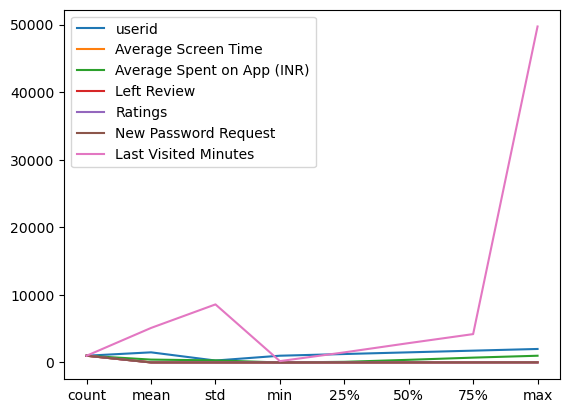

In [7]:
# Plotting the Statistical Data
df.describe().plot()

In [8]:
# Mean of Average Screen Time Column
df['Average Screen Time'].mean()

24.39039039039039

In [9]:
# Maximum Value of Average Screen Time Column
df['Average Screen Time'].max()

50.0

In [10]:
# Minimum Value of Average Screen Time Column
df['Average Screen Time'].min()

0.0

In [11]:
# Mean of Average Spent on the App Column
df['Average Spent on App (INR)'].mean()

424.4154154154154

In [12]:
# Maximum Value of Average Spent on the App Column
df['Average Spent on App (INR)'].max()

998.0

In [13]:
# Minimum Value of Average Spent on App Columns
df['Average Spent on App (INR)'].min()

0.0

In [14]:
# Information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [15]:
# Checking for Null/Empty Values
df.isnull().sum()

userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64

In [16]:
# Checking for Duplicated Values
df.duplicated().sum()

0

In [17]:
# Column Names of the Dataset
df.columns

Index(['userid', 'Average Screen Time', 'Average Spent on App (INR)',
       'Left Review', 'Ratings', 'New Password Request',
       'Last Visited Minutes', 'Status'],
      dtype='object')

In [18]:
# Values of Status Dataset
df.Status.value_counts()

Status
Installed      916
Uninstalled     83
Name: count, dtype: int64

### Data Visualization

<Axes: ylabel='Ratings'>

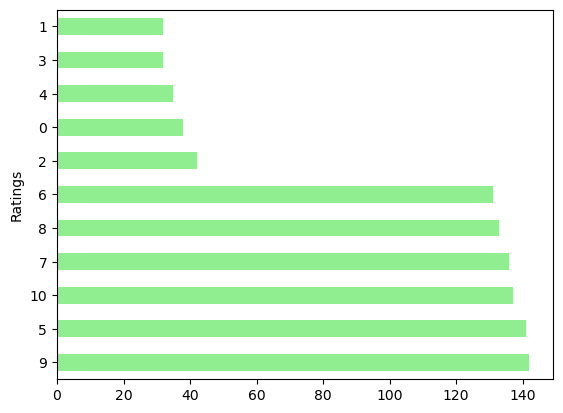

In [19]:
# Plotting the Ratings Values in a Horizontal Bar Graph
df.Ratings.value_counts().plot(kind='barh',color = 'lightgreen')

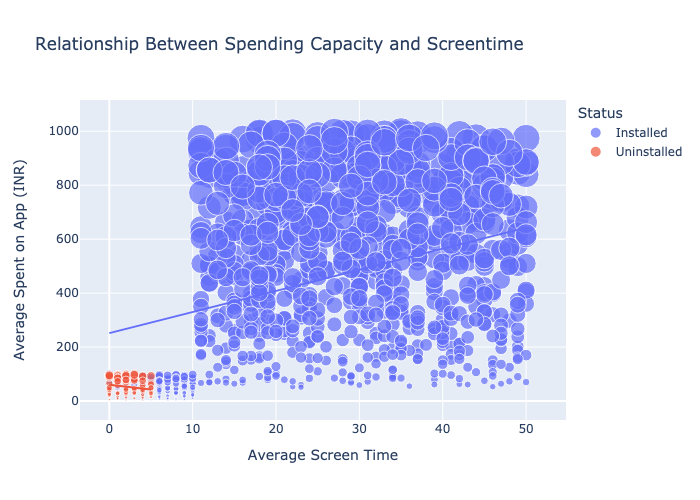

In [20]:
# Plotting Relationship B/w Spending Capacity and Screentime
figure1 = px.scatter(data_frame = df,x = 'Average Screen Time', 
                    y = 'Average Spent on App (INR)',
                    size = 'Average Spent on App (INR)', 
                    color ='Status', trendline = 'ols',
                   title = "Relationship Between Spending Capacity and Screentime")
figure1.show('png')

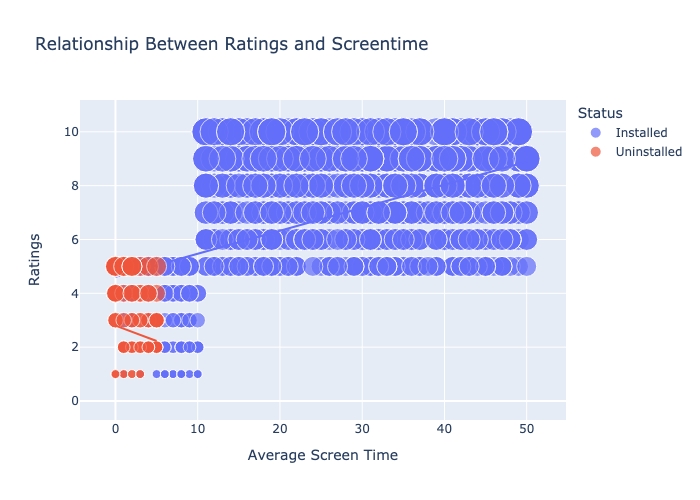

In [21]:
# Plotting Relationship B/w Ratings and Screentime
figure2 = px.scatter(data_frame = df, 
           x='Average Screen Time', 
           y='Ratings',
           size ='Ratings',
           color ='Status',
           trendline='ols',
          title = 'Relationship Between Ratings and Screentime')
figure2.show('png')

In [22]:
# Dropping the Columns
df = df.drop(['userid','Status'],axis=1)

In [23]:
# Checking for Dropped Columns
df.head()

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
0,17.0,634.0,1,9,7,2990
1,0.0,54.0,0,4,8,24008
2,37.0,207.0,0,8,5,971
3,32.0,445.0,1,6,2,799
4,45.0,427.0,1,5,6,3668


In [24]:
# Correlation of the Dataset
correlation = df.corr()

<Axes: >

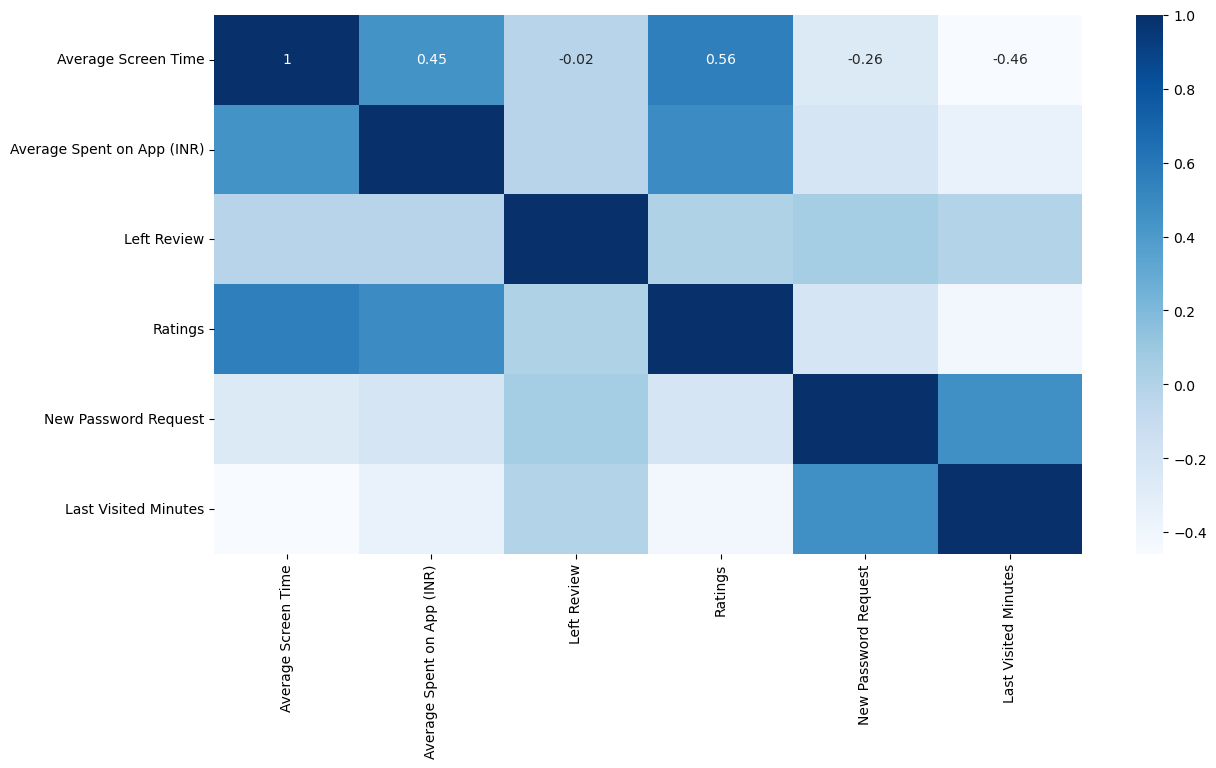

In [25]:
# Plotting the Heatmap of the Correlation
plt.figure(figsize=(14,7))
sns.heatmap(correlation, annot = True, cmap='Blues')

In [26]:
# Normalizing the Values in a Dataset
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [27]:
# Values Scalled Equally
df

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
0,17.0,634.0,1,9,7,2990
1,0.0,54.0,0,4,8,24008
2,37.0,207.0,0,8,5,971
3,32.0,445.0,1,6,2,799
4,45.0,427.0,1,5,6,3668
...,...,...,...,...,...,...
994,38.0,938.0,0,5,4,1865
995,43.0,61.0,0,6,8,1327
996,47.0,761.0,0,6,1,1936
997,6.0,73.0,1,5,1,3436


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of

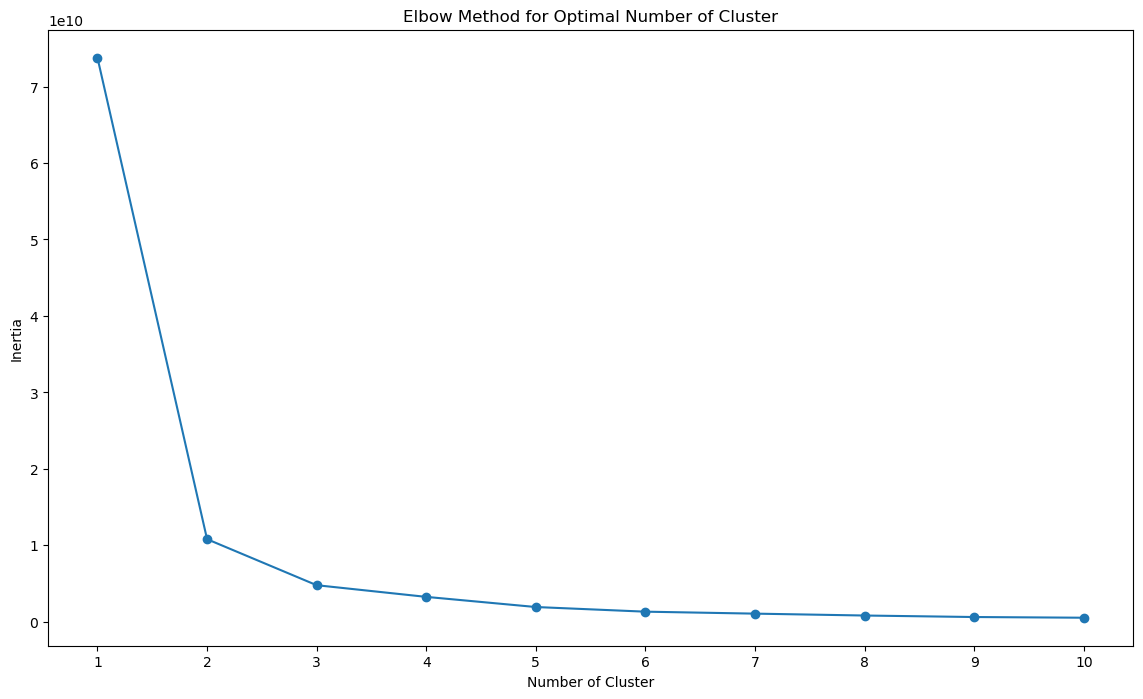

In [28]:
# Plotting Elbow Method 
inertia_values = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state =42)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize = (14,8))
plt.plot(k_range,inertia_values,marker='o')
plt.title('Elbow Method for Optimal Number of Cluster')
plt.xticks(k_range)
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.show()

In [29]:
# Choosing 3 as the Optimal Number of Clusters
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(df)
df['Segments'] = clusters

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [30]:
# Vaulues in Segments Column
df.Segments.value_counts()

Segments
0    910
1     45
2     44
Name: count, dtype: int64

In [31]:
# Mapping the Values in Segments to Numeric Value
df['Segments'] = df['Segments'].map({0:'Retained', 1: 'Churn', 2: 'Need Attention'})
df

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Segments
0,17.0,634.0,1,9,7,2990,Retained
1,0.0,54.0,0,4,8,24008,Need Attention
2,37.0,207.0,0,8,5,971,Retained
3,32.0,445.0,1,6,2,799,Retained
4,45.0,427.0,1,5,6,3668,Retained
...,...,...,...,...,...,...,...
994,38.0,938.0,0,5,4,1865,Retained
995,43.0,61.0,0,6,8,1327,Retained
996,47.0,761.0,0,6,1,1936,Retained
997,6.0,73.0,1,5,1,3436,Retained


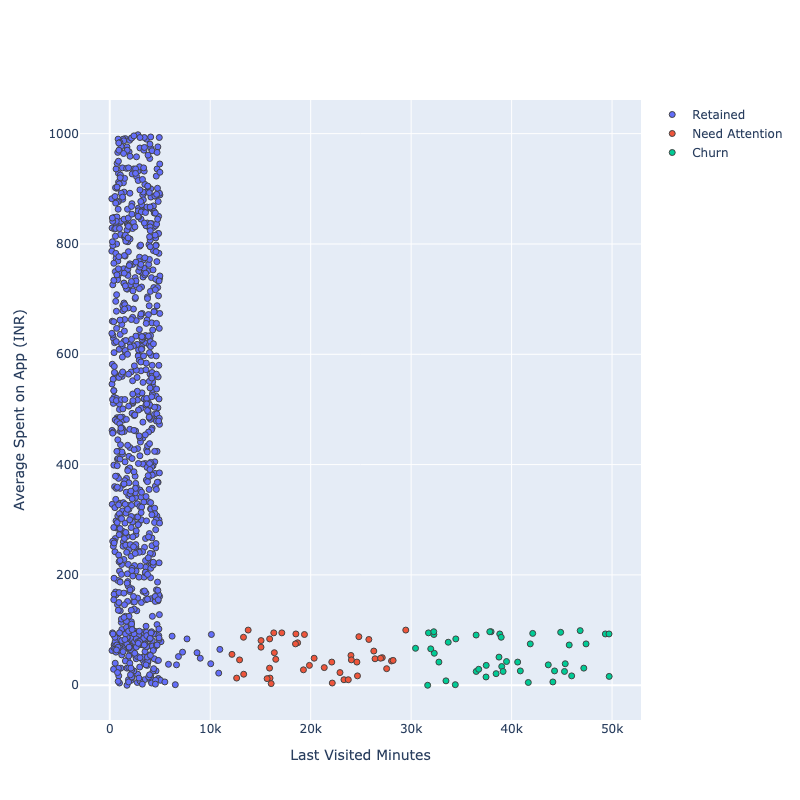

In [32]:
# Plotting the Segmentation of the Users as a Scatter Plot
PLOT = go.Figure()
for i in list(df["Segments"].unique()):
    

    PLOT.add_trace(go.Scatter(x = df[df["Segments"]== i]['Last Visited Minutes'],
                                y = df[df["Segments"] == i]['Average Spent on App (INR)'],
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Last Visited Minutes: %{x} <br>Average Spent on App (INR): %{y}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   yaxis_title = 'Average Spent on App (INR)',
                   xaxis_title = 'Last Visited Minutes',
                   scene = dict(xaxis=dict(title = 'Last Visited Minutes', titlefont_color = 'black'),
                                yaxis=dict(title = 'Average Spent on App (INR)', titlefont_color = 'black')))
PLOT.show('png')